# Changing network centrality

In this notebook we explore how network centrality changes with topology.

In [1]:
# networks
import networkx

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

Let's create a set of ER networks of the same size but increasing mean degree.

In [14]:
N = int(1e3)
kmeans = range(10, 30)

For each network we can extract the average betweenness centrality of nodes. 

In [12]:
def averageBetweeness(g):
    '''Return the average betweenness centrality of nodes in a network.
    
    :param g: the network
    :returns: the average betweenness centrality'''
    bc = networkx.betweenness_centrality(g)
    
    bctot = 0
    for n in bc.keys():
        bctot += bc[n]
    bcmean = bctot / len(bc)
    
    return bcmean

In [15]:
bcs = []
for kmean in kmeans:
    g = networkx.fast_gnp_random_graph(N, (kmean / N))
    bcs.append(averageBetweeness(g))

Plotting the results yields the variation of centrality with mean degree.

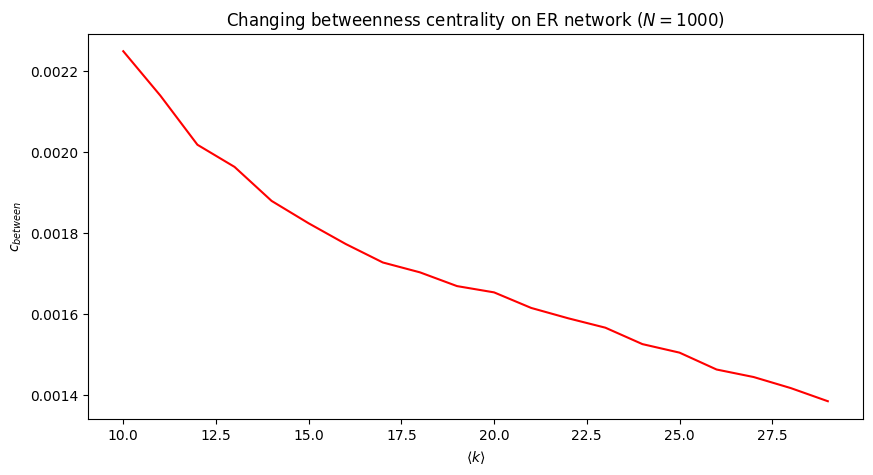

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

# plot the values
ax.plot(kmeans, bcs, 'r-')
                        
# set title and axis limits
ax.set_title(f'Changing betweenness centrality in an ER network ($N = {N}$)')
ax.set_xlabel('$\\langle k \\rangle$')
ax.set_ylabel('$c_{between}$')
plt.show()

What does this tell us? It says that nodes in sparser-connected networks are on average between more pairs of nodes. That makes sense: there are fewer paths between nodes, which forces more of the shortest paths to go through fewer nodes. As networks get more connected, they get a more diverse set of paths, and tend not to focus so much on fewer nodes in general.

But is that the whole story? What effect does topology have? How does the *maximum* betweenness vary, rather than just the mean?